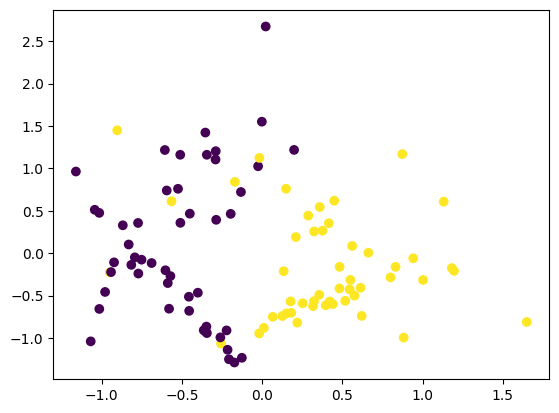

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from tree.base import DecisionTree
# from metrics import *
from tree.base import DecisionTree
from metrics import *
from tree.base import DecisionTree

np.random.seed(42)

#generating dataset as given in the question
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],c=y)

In [3]:
#Part a

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
tree = DecisionTree(criterion="gini_index")
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)
X_test = pd.DataFrame(X_test)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_test = pd.Series(y_test)

print("Accuracy:", accuracy(y_pred, y_test))
for cls in y_test.unique():
    print(f"precision of class {cls}: ", precision(y_pred, y_test, cls))
    print(f"recall of class {cls}: ", recall(y_pred, y_test, cls))

Accuracy: 0.9
precision of class 1:  1.0
recall of class 1:  0.8
precision of class 0:  0.8333333333333334
recall of class 0:  1.0


In [5]:
#Part b

#5 fold cross validation    

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

k= 5
fsize= len(y)//k
acc = []

for i in range(k):
    start= i* fsize
    end = (i+1) * (fsize)

    X_train = pd.DataFrame(list(X[:start]) + list(X[end:]))
    y_train = pd.Series(list(y[:start]) + list(y[end:]))

    X_test = pd.DataFrame(X[start:end])
    y_test = pd.Series(y[start:end])

    model = DecisionTree(criterion="information_gain")
    model.fit(X_train.reset_index(drop=True), y_train.reset_index(drop=True))

    preds= model.predict(X_test.reset_index(drop=True))
    accur= accuracy(preds, y_test.reset_index(drop=True))
    acc.append(accur)
    print(f"Fold {i+1} accuracy: {accur:.4f}")

print(f"Best fold accuracy: {max(acc):.4f}")
print(f"Average accuracy: {sum(acc)/len(acc):.4f}")

Fold 1 accuracy: 0.9000
Fold 2 accuracy: 0.9500
Fold 3 accuracy: 0.9000
Fold 4 accuracy: 0.8500
Fold 5 accuracy: 0.9500
Best fold accuracy: 0.9500
Average accuracy: 0.9100


In [12]:
#nested cross validation


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=2, class_sep=0.5)

k=5
d_max= 10
f_size= len(y) // k
depths = []

def select_depth(records, k, d_max):
    avg_acc = []
    for d in range(1, d_max + 1):
        vals = [rec[3] for fold in records for rec in fold if rec[2] == d]
        avg_acc.append(sum(vals) / k)
    return avg_acc.index(max(avg_acc)) + 1

for i in range(k):
    start, end = i * f_size, (i + 1) * f_size
    X_train = pd.DataFrame(list(X[:start]) + list(X[end:]))
    y_train = pd.Series(list(y[:start]) + list(y[end:]))
    X_test = pd.DataFrame(X[start:end])
    y_test = pd.Series(y[start:end])

    inner_res = []
    inner_size = len(y_train) // k

    for j in range(k):
        start_i, end_i = j * inner_size, (j + 1) * inner_size
        X_in= pd.DataFrame(list(X_train[:start_i].values) + list(X_train[end_i:].values))
        y_in= pd.Series(list(y_train[:start_i].values) + list(y_train[end_i:].values))
        X_val= pd.DataFrame(X_train[start_i:end_i].values)
        y_val= pd.Series(y_train[start_i:end_i].values)

        iter_res= []
        for d in range(1, d_max + 1):
            clf= DecisionTree(criterion="information_gain", max_depth=d)
            clf.fit(X_in.reset_index(drop=True), y_in.reset_index(drop=True))
            preds= clf.predict(X_val.reset_index(drop=True))
            acc= accuracy(preds, y_val.reset_index(drop=True))
            iter_res.append([i, j, d, acc])
        inner_res.append(iter_res)

    d_opt = select_depth(inner_res, k, d_max)
    depths.append(d_opt)

    final_clf = DecisionTree(criterion="information_gain", max_depth=d_opt)
    final_clf.fit(X_train.reset_index(drop=True), y_train.reset_index(drop=True))
    preds = final_clf.predict(X_test.reset_index(drop=True))
    acc = accuracy(preds, y_test.reset_index(drop=True))
    print(f"Fold {i+1}: depth={d_opt}, acc={acc:.4f}")

print("Chosen depths:", depths)

Fold 1: depth=2, acc=0.9000
Fold 2: depth=1, acc=0.8500
Fold 3: depth=2, acc=0.9000
Fold 4: depth=1, acc=0.8500
Fold 5: depth=2, acc=0.9500
Chosen depths: [2, 1, 2, 1, 2]
